In [1]:
from google.colab import files

uploaded = files.upload()
import warnings
warnings.filterwarnings("ignore")



Saving household_power_consumption.csv to household_power_consumption.csv


In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('household_power_consumption.csv')
df

,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,1/1/07,0:00:00,2.58,0.136,241.97,10.6,0,0,0.0
1,1,1/1/07,0:01:00,2.552,0.1,241.75,10.4,0,0,0.0
2,2,1/1/07,0:02:00,2.55,0.1,241.64,10.4,0,0,0.0
3,3,1/1/07,0:03:00,2.55,0.1,241.71,10.4,0,0,0.0
4,4,1/1/07,0:04:00,2.554,0.1,241.98,10.4,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
260635,260635,30/6/2007,23:55:00,2.88,0.36,239.01,12,0,0,18.0
260636,260636,30/6/2007,23:56:00,2.892,0.358,238.86,12.2,0,0,17.0
260637,260637,30/6/2007,23:57:00,2.882,0.28,239.05,12,0,0,18.0
260638,260638,30/6/2007,23:58:00,2.66,0.29,238.98,11.2,0,0,18.0


In [4]:
df = df.drop(['index'], axis=1)
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'])
df = df.sort_values('Date')

df['Sub_metering_1']=df['Sub_metering_1'].replace({'?':'0'})
df['Sub_metering_2']=df['Sub_metering_2'].replace({'?':'0'})
df['Sub_metering_2']=df['Sub_metering_2'].replace({'?':'0'})
df.groupby(['Sub_metering_1']).count()
df['Sub_metering_1']=pd.DataFrame(np.array(df['Sub_metering_1'],dtype='float32'))
df['Sub_metering_2']=pd.DataFrame(np.array(df['Sub_metering_2'],dtype='float32'))
df['Sub_metering_3']=df['Sub_metering_3'].fillna(method='bfill')

Text(0.5, 1.0, '1-HOUR AVERAGE')

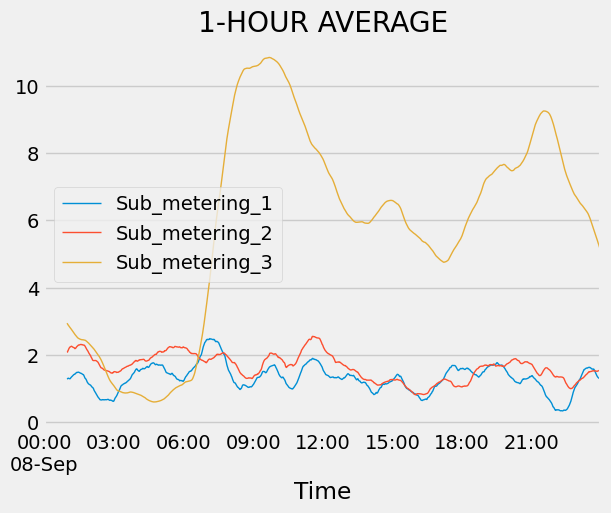

In [5]:
df.groupby(['Time']).mean().rolling(60).mean().plot(linewidth=1)
plt.title('1-HOUR AVERAGE')


Text(0.5, 1.0, '10-DAY AVERAGE')

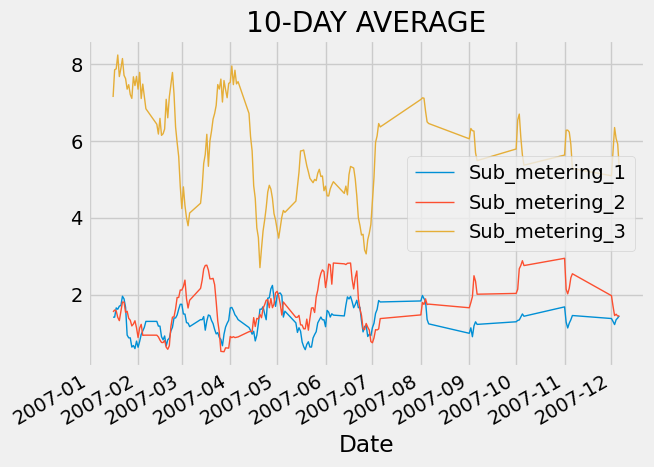

In [6]:
df.groupby(['Date']).mean().rolling(10).mean().plot(linewidth=1)
plt.title('10-DAY AVERAGE')


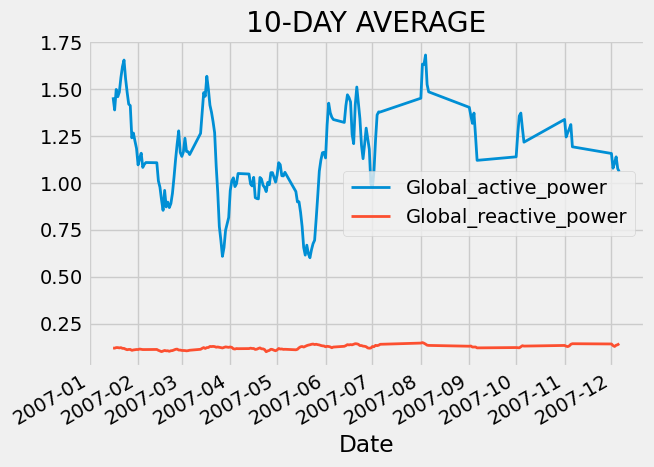

In [7]:
df['Global_active_power']=df['Global_active_power'].replace({'?':0.214})
df['Global_reactive_power']=df['Global_reactive_power'].replace({'?':0.1})
# THESE ARE THE MOST COMMONLY OCCURING VALUES IN THE FEATURE

df[['Global_reactive_power','Global_active_power']]=pd.DataFrame(np.array(df[['Global_reactive_power','Global_active_power']],dtype='float32'))
##df.groupby(['Date']).mean()[['Global_active_power','Global_reactive_power']].plot(linewidth=2)
df.groupby(['Date']).mean()[['Global_active_power','Global_reactive_power']].rolling(10).mean().plot(linewidth=2)
plt.title('10-DAY AVERAGE')
plt.show()


Text(0, 0.5, 'Voltage')

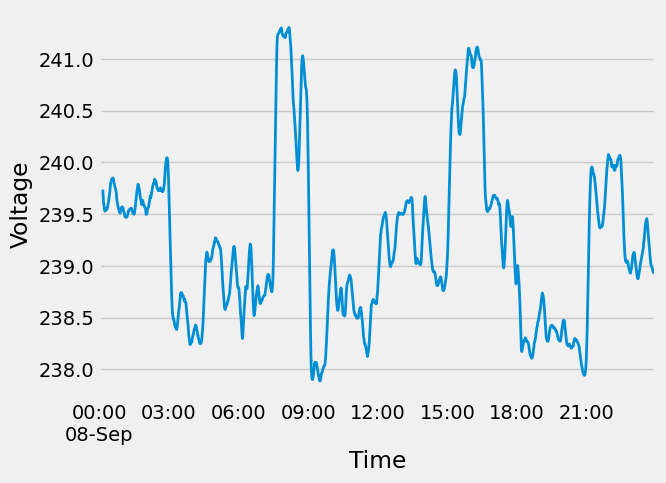

In [8]:
#df.groupby(['Voltage']).count().sort_values('Time',ascending=False)
df['Voltage']=df['Voltage'].replace({'?':240})
df['Voltage']=pd.DataFrame(np.array(df['Voltage'],dtype='float32'))
df.groupby(['Time']).mean()['Voltage'].rolling(10).mean().plot(linewidth=2)
plt.ylabel('Voltage')

Text(0, 0.5, 'Voltage')

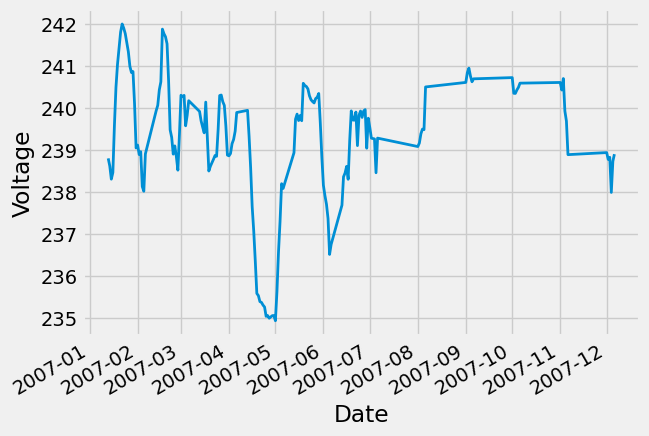

In [9]:
df.groupby(['Date']).mean()['Voltage'].rolling(7).mean().plot(linewidth=2)
plt.ylabel('Voltage')

MODELLING USING ARIMA


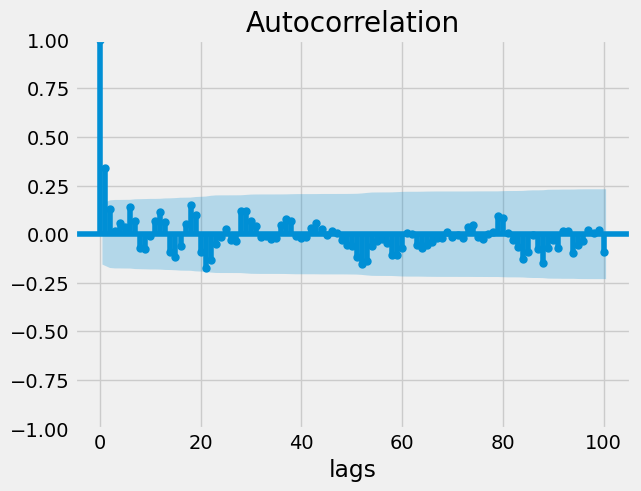

In [10]:
from statsmodels.graphics.tsaplots import plot_acf

## PLOTTING AUTO CORRELATION AND PARTIAL CORRELATION
plot_acf(df.groupby(['Date']).mean()['Global_active_power'][:'2007-08'],lags=100,title="Global Reactive Power")
plt.xlabel('lags')
plt.title('Autocorrelation')
plt.show()

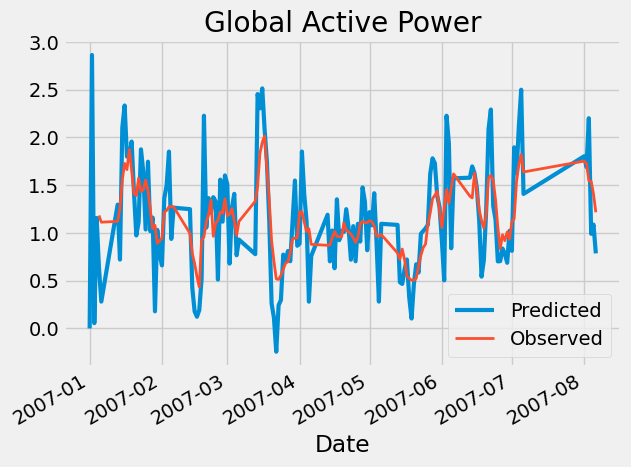

In [12]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

act_power_df=df.groupby(['Date']).mean()['Global_active_power'][:'2007-08']
model1=ARIMA(act_power_df,order=(5,2,0))
preds=model1.fit().predict()
plt.plot(preds,linewidth=3)
act_power_df.rolling(5).mean().plot(linewidth=2)
plt.legend(['Predicted','Observed'])
plt.xlabel('Date')
plt.title('Global Active Power')
plt.show()


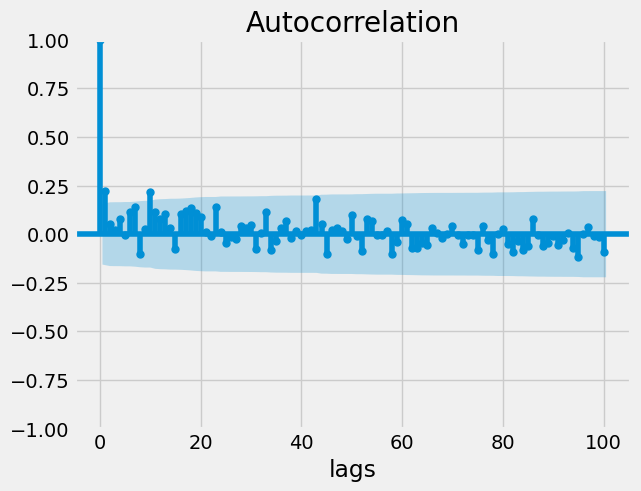

In [13]:
plot_acf(df.groupby(['Date']).mean()['Global_reactive_power'][:'2007-08'],lags=100,title="Global Reactive Power")
plt.xlabel('lags')
plt.title('Autocorrelation')
plt.show()

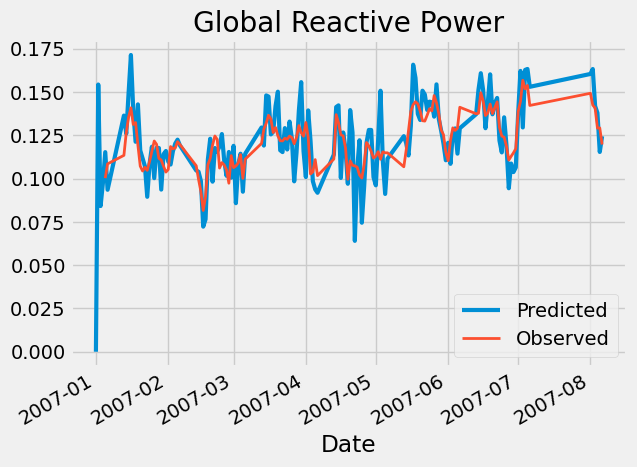

In [14]:
react_power_df=df.groupby(['Date']).mean()['Global_reactive_power'][:'2007-08']
model2=ARIMA(react_power_df,order=(10,2,0))
preds=model2.fit().predict()
plt.plot(preds,linewidth=3)
react_power_df.rolling(5).mean().plot(linewidth=2)
plt.legend(['Predicted','Observed'])
plt.xlabel('Date')
plt.title('Global Reactive Power')
plt.show()

In [22]:
import requests
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Load your power consumption data
# ...

# Telegram Bot API token
bot_token = '6455039310:AAFRYIA84tfIO1enBGVhC4e2WZE2CnYqibs'

# Your chat ID
chat_id = '1895653291'

# Define anomaly thresholds for each sub-metering column
anomaly_thresholds = {
    'Sub_metering_1': 2.0,
    'Sub_metering_2': 50000,
    'Sub_metering_3': 3.0
}
def perform_arima_prediction(data):
    # Perform ARIMA prediction on the given data
    model = ARIMA(data, order=(5,1,0))
    model_fit = model.fit()
    predictions = model_fit.predict()
    return predictions

# Loop through each sub-metering column
for column in ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']:
    sub_metering_data = df[column]  # Extract the data for the current sub-metering column
    sub_metering_preds = perform_arima_prediction(sub_metering_data)

    # Calculate the mean and standard deviation of the prediction errors
    errors = sub_metering_preds - sub_metering_data

    # Get the predefined anomaly threshold for the current sub-metering column
    anomaly_threshold = anomaly_thresholds[column]

    # Detect anomalies based on the threshold
    anomalies = sub_metering_preds[errors > anomaly_threshold]

    # If anomalies are detected, send a message to your Telegram bot
    if not anomalies.empty:
        message = f"Anomaly detected in {column} power consumption! Please check your energy usage."

        # Send message using the Telegram Bot API
        url = f"https://api.telegram.org/bot{bot_token}/sendMessage"
        params = {"chat_id": chat_id, "text": message}
        response = requests.get(url, params=params)

        print("Telegram message sent:", response.json())


Telegram message sent: {'ok': True, 'result': {'message_id': 9, 'from': {'id': 6455039310, 'is_bot': True, 'first_name': 'Anomaly Detection', 'username': 'powerpredsbot'}, 'chat': {'id': 1895653291, 'first_name': 'Manaswini Simhadri', 'last_name': 'Kavali', 'type': 'private'}, 'date': 1694184960, 'text': 'Anomaly detected in Sub_metering_1 power consumption! Please check your energy usage.'}}
Telegram message sent: {'ok': True, 'result': {'message_id': 10, 'from': {'id': 6455039310, 'is_bot': True, 'first_name': 'Anomaly Detection', 'username': 'powerpredsbot'}, 'chat': {'id': 1895653291, 'first_name': 'Manaswini Simhadri', 'last_name': 'Kavali', 'type': 'private'}, 'date': 1694184987, 'text': 'Anomaly detected in Sub_metering_3 power consumption! Please check your energy usage.'}}
